In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from modules.models.baselines import static_stat_forecast, rolling_stat_forecast, ewm_forecast
from modules.diagnostics.visualizers import visualize_forecast_horizon_accuracy
from modules.diagnostics.metrics import compute_rmse
from modules.data_handling.data_splitters import split_time_series_df

# Constants

In [10]:
TRAINING_END_DATE = "2016-01-01"

DATA_FOLDER = "data"
GHI_FILE = "irradiance.csv"
WEATHER_FORECAST_FILES = [
    "nam_lat38.579454_lon121.260320.csv"
]
SATELLITE_FILE = "satellite.csv"

# Data Loading

In [32]:
ghi_df = pd.read_csv(os.path.join(DATA_FOLDER, GHI_FILE), parse_dates=["timeStamp"])
idx = pd.date_range(ghi_df["timeStamp"].min(), ghi_df["timeStamp"].max(), freq="1min")
ghi_df = ghi_df.set_index("timeStamp") 
ghi_df = ghi_df.reindex(idx, fill_value=0)
ghi_df = ghi_df.reset_index().rename({"index": "time"}, axis=1)

weather_df = []
for weather_forecast_file in WEATHER_FORECAST_FILES:
    
    weather_df.append(pd.read_csv(os.path.join(DATA_FOLDER, weather_forecast_file)))
    

weather_df = pd.concat(weather_df, ignore_index=True)

saletllite_df = pd.read_csv(os.path.join(DATA_FOLDER, SATELLITE_FILE), header=None)

# Data Preparation I

# Data Exploration

## Quality Check

## Characteristics

## Modelling Preparation

# Data Preparation II

# Modelling

Timestamp('2016-01-01 00:00:00')

In [62]:
start_date = pd.to_datetime(TRAINING_END_DATE)

ground_truth = []
forecasts = []

for step in range(60 * 24 * 7):

    insample_df, outsample_df = split_time_series_df(
        df=ghi_df,
        start_date=start_date,
        time_column="time",
        steps_ahead=30,
        resolution="m"
    )

    start_date += pd.to_timedelta(1, unit="m")

    insample_series = insample_df["ghi"].values
    outsample_series = outsample_df["ghi"].values

    insample_forecast, outsample_forecast = ewm_forecast(
        time_series=insample_series,
        steps_ahead=30,
        alpha=0.5,
    )

    ground_truth.append(outsample_series)
    forecasts.append(outsample_forecast)

ground_truth = np.array(ground_truth)
forecasts = np.array(forecasts)

KeyboardInterrupt: 

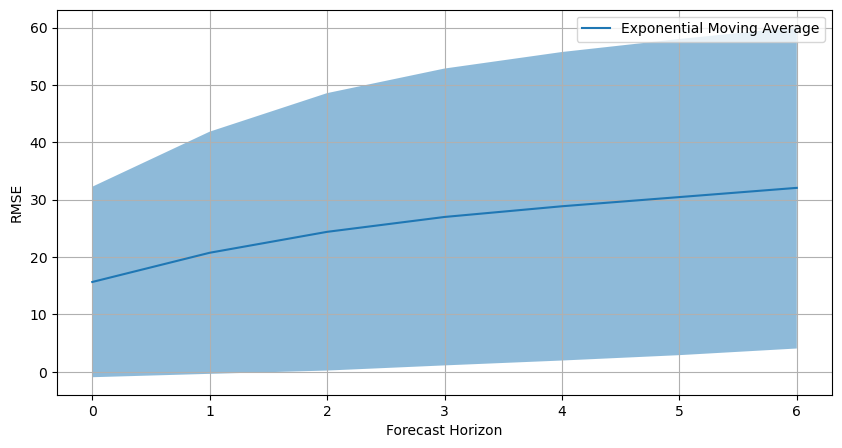

In [75]:
ground_truth = np.array(ground_truth)
forecasts = np.array(forecasts)

error_mean, error_sem = compute_rmse(
    y_true=ground_truth,
    y_forecast=forecasts,
    axis=0
)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = visualize_forecast_horizon_accuracy(
    ax=ax,
    model_name="Exponential Moving Average",
    error_name="RMSE",
    error_mean=error_mean,
    error_sem=error_sem
)
plt.legend()
plt.show()

In [73]:
error_sem

array([ 6.64074532,  8.44248827,  9.67220818, 10.34970004, 10.75571581,
       11.02189888, 11.20067191])

In [69]:
ground_truth.shape

(2307, 7)